In [1]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

2024-06-10 11:04:45.314310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 11:04:45.992131: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-06-10 11:04:45.992173: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-06-10 11:04:45.992179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [9]:
link = "Resultados/ModelosConvLSTM/V4W10D30X90F4"
linkGuardadoDecoder = link

archivoData = "PredictionsConvolutionLSTM_forecast_30_90_EspacioLatente_w10.npy"
linkDecodificador = "Resultados/ModelosAutoencoder/V4W10D30X90F4/decoder.h5"



In [10]:
data = np.load(link+"/"+archivoData)
#data = data/255.
print("data" , link+archivoData)
print("data shape",data.shape)


data Resultados/ModelosConvLSTM/V4W10D30X90F4PredictionsConvolutionLSTM_forecast_30_90_EspacioLatente_w10.npy
data shape (374, 9, 30, 90, 4)


<Figure size 2000x2000 with 0 Axes>

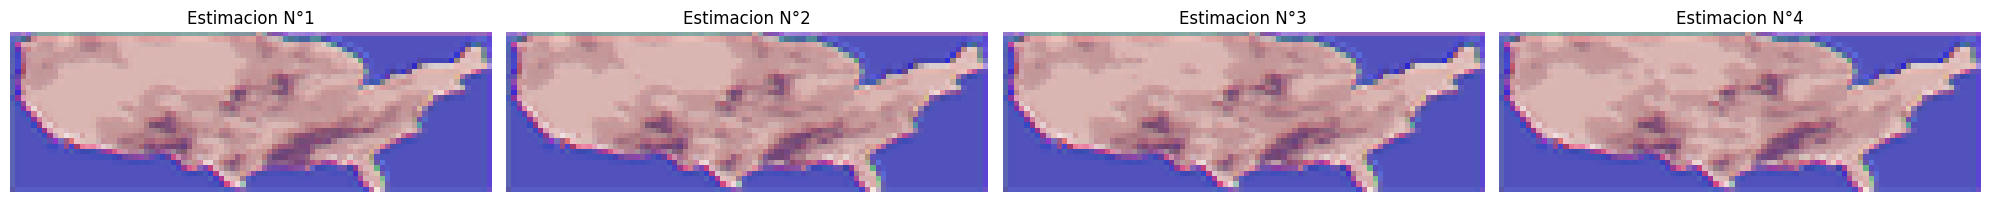

In [11]:
fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 373
horizon = 4

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(data[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()

In [12]:
# carga del decodor 
decoder = keras.models.load_model(linkDecodificador)
print (decoder.summary())

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 90, 4)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 90, 4)         148       
                                                                 
 up_sampling2d (UpSampling2D  (None, 60, 180, 4)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 180, 8)        296       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 120, 360, 8)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 120, 360, 1)       73  

2024-06-10 11:09:24.381575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-10 11:09:24.382057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-10 11:09:24.386186: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-10 11:09:24.386623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-10 11:09:24.387039: I tensorflow/compiler/xla/stream_executo

In [13]:
decorderData = decoder.predict(data[pos])

results = np.zeros((374, 4, 120, 360, 1))

for i in range(data.shape[0]):
    # Selecciona los últimos 4 marcos de cada muestra
    last_4_frames = data[i, -4:, :, :, :]
    #datas255 = data[i, :, :, :, :]
    # Realiza la predicción utilizando los últimos 4 marcos
    result = decoder.predict(last_4_frames)
    
    # Guarda el resultado en el arreglo de resultados
    results[i] = result
    print("result N°",i, "shape", result.shape)


#guardar resultado
np.save(linkGuardadoDecoder+"/resultadosDecoder.npy", results)

2024-06-10 11:10:33.396808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-06-10 11:10:33.841554: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1/1 [==============================] - 0s 48ms/step
result N° 0 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 1 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 2 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 3 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 16ms/step
result N° 4 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 14ms/step
result N° 5 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 15ms/step
result N° 6 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 15ms/step
result N° 7 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 16ms/step
result N° 8 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 16ms/step
result N° 9 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 16ms/step
result N° 10 shape (4, 120, 360, 1)
1/1 [==============================] - 0s 

In [14]:
print("decorderData shape",results.shape)

decorderData shape (374, 4, 120, 360, 1)


In [15]:
np.save(linkGuardadoDecoder+"/ResultadosEstimacionDecodificacionSinCategorico.npy", results)

<Figure size 2000x2000 with 0 Axes>

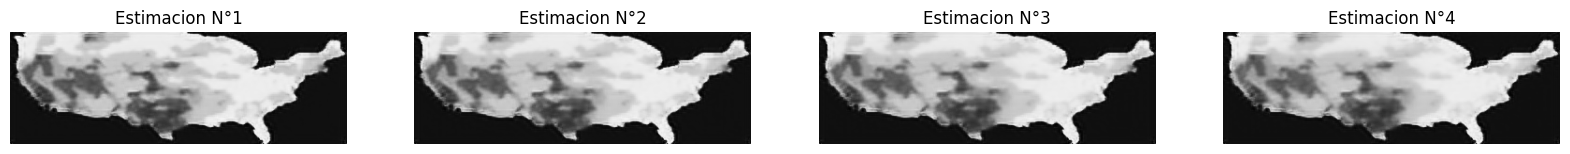

In [16]:


fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 300

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(results[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1

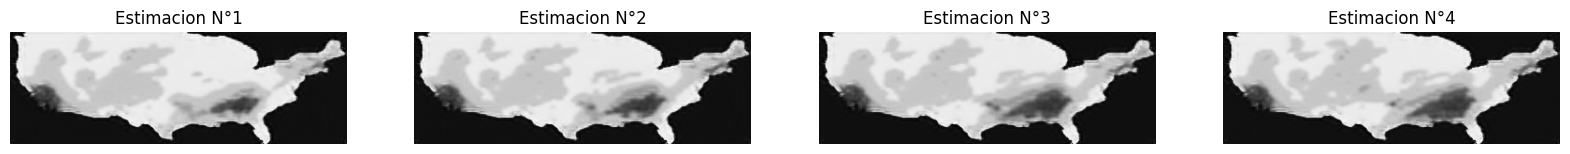

In [17]:
#show ech decoded image
fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(results[i][0], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1

posicion 300


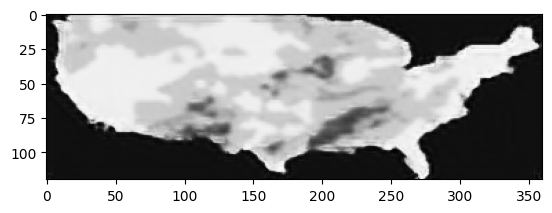

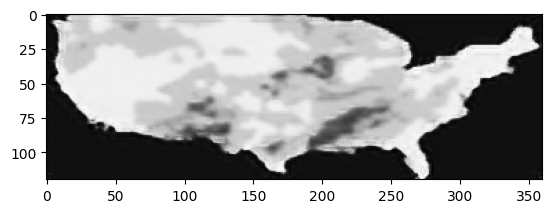

In [18]:
#mostrar la primer imagen
print("posicion", pos)
plt.imshow(decorderData[5], cmap='gray')
plt.show()
plt.imshow(result[0], cmap='gray')
plt.show()

In [19]:
valoresUnicos = np.unique(results[0])
print("valoresUnicos",valoresUnicos)
print("leng val",len(valoresUnicos))
print("max",np.max(results[0]))
print("min",np.min(results[0]))

valoresUnicos [0.00887682 0.00978659 0.01019783 ... 0.99254721 0.99268484 0.99287605]
leng val 163587
max 0.9928760528564453
min 0.008876819163560867
